# Surgery Process
### Initial Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

* Data type validation

In [2]:
booking_df = pd.read_csv('data/OR Booking.csv')
booking_df.info()
booking_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HCID                  1229 non-null   int64  
 1   Pt Age                1164 non-null   float64
 2   Proc Descr Mod        1229 non-null   object 
 3   Req Proc Tm           1229 non-null   object 
 4   Pt Priority           1229 non-null   object 
 5   OR Booking Req DT/Tm  1229 non-null   object 
 6   Pt Loc                1229 non-null   object 
 7   Proc DT               1229 non-null   object 
 8   Pt OR Chk In          1229 non-null   object 
 9   Pt In OR              1229 non-null   object 
 10  OR                    1229 non-null   int64  
 11  Pt Trns               1229 non-null   object 
 12  ORR#                  1229 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 124.9+ KB


,HCID,Pt Age,Proc Descr Mod,Req Proc Tm,Pt Priority,OR Booking Req DT/Tm,Pt Loc,Proc DT,Pt OR Chk In,Pt In OR,OR,Pt Trns,ORR#
0,1805294,40.0,Laparoscopy Appendectomy,0060,E-06H,2019-01-12 03:00:00,35,2019-01-12,1000,1025,5,PARU,1065487
1,2233815,58.0,Laparoscopy Cholecystectomy,0060,E-24H,2019-01-21 17:12:00,ER,2019-01-21,1827,1905,5,PARU,1065535
2,1043375,31.0,Laparoscopy Appendectomy,0060,E-06H,2019-01-22 03:30:00,ER,2019-01-22,0750,0800,5,PARU,1065583
3,1203917,45.0,Laparoscopy Cholecystectomy,0060,E-24H,2019-01-29 18:12:00,56,2019-01-30,1728,1805,7,PARU,1065615
4,2616633,46.0,Laparoscopy Appendectomy,,E-06H,2019-01-30 05:30:00,35,2019-01-30,0740,0800,10,PARU,1065660


* Convert to datetime fields
    - OR Booking Req DT/Tm (%Y-%m-%d %H:%M:%S)
    - Proc DT (%Y-%m-%d)
    - Pt OR Chk In (%H%M)
    - Pt In OR (%H%M)

In [3]:
booking_df['OR Booking Req DT/Tm'] = pd.to_datetime(booking_df['OR Booking Req DT/Tm'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
booking_df['Proc DT'] = pd.to_datetime(booking_df['Proc DT'], format='%Y-%m-%d', errors='coerce')
booking_df['Pt OR Chk In'] = pd.to_datetime(booking_df['Pt OR Chk In'], format='%H%M', errors='coerce')
booking_df['Pt In OR'] = pd.to_datetime(booking_df['Pt In OR'], format='%H%M', errors='coerce')
booking_df.info()
booking_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   HCID                  1229 non-null   int64         
 1   Pt Age                1164 non-null   float64       
 2   Proc Descr Mod        1229 non-null   object        
 3   Req Proc Tm           1229 non-null   object        
 4   Pt Priority           1229 non-null   object        
 5   OR Booking Req DT/Tm  1229 non-null   datetime64[ns]
 6   Pt Loc                1229 non-null   object        
 7   Proc DT               1229 non-null   datetime64[ns]
 8   Pt OR Chk In          1228 non-null   datetime64[ns]
 9   Pt In OR              1225 non-null   datetime64[ns]
 10  OR                    1229 non-null   int64         
 11  Pt Trns               1229 non-null   object        
 12  ORR#                  1229 non-null   int64         
dtypes: datetime64[ns](

,HCID,Pt Age,Proc Descr Mod,Req Proc Tm,Pt Priority,OR Booking Req DT/Tm,Pt Loc,Proc DT,Pt OR Chk In,Pt In OR,OR,Pt Trns,ORR#
0,1805294,40.0,Laparoscopy Appendectomy,0060,E-06H,2019-01-12 03:00:00,35,2019-01-12,1900-01-01 10:00:00,1900-01-01 10:25:00,5,PARU,1065487
1,2233815,58.0,Laparoscopy Cholecystectomy,0060,E-24H,2019-01-21 17:12:00,ER,2019-01-21,1900-01-01 18:27:00,1900-01-01 19:05:00,5,PARU,1065535
2,1043375,31.0,Laparoscopy Appendectomy,0060,E-06H,2019-01-22 03:30:00,ER,2019-01-22,1900-01-01 07:50:00,1900-01-01 08:00:00,5,PARU,1065583
3,1203917,45.0,Laparoscopy Cholecystectomy,0060,E-24H,2019-01-29 18:12:00,56,2019-01-30,1900-01-01 17:28:00,1900-01-01 18:05:00,7,PARU,1065615
4,2616633,46.0,Laparoscopy Appendectomy,,E-06H,2019-01-30 05:30:00,35,2019-01-30,1900-01-01 07:40:00,1900-01-01 08:00:00,10,PARU,1065660


***NOTE***: The PT priority column reflects the number of hours before they should be operated on based on their condition.  (for example E-06H means the should be operated on with 6 hours after their diagnosis and subsequent booking).

* Calculate date time for when each patient should have their procedure started by based on the PT priority column compared to the OR Booking Req DT/Tm.

In [4]:
# Extract number of hour before they should be operated
booking_df['Expected Wait Tm(H)'] = booking_df['Pt Priority'].str.extract('^.+-([0-6]+)H').astype(int)[0]
# Add to the OR Booking Req DT/Tm
booking_df['Expected Proc DT/Tm'] = booking_df['OR Booking Req DT/Tm'] + pd.to_timedelta(booking_df['Expected Wait Tm(H)'], unit='hours')
booking_df.head()

,HCID,Pt Age,Proc Descr Mod,Req Proc Tm,Pt Priority,OR Booking Req DT/Tm,Pt Loc,Proc DT,Pt OR Chk In,Pt In OR,OR,Pt Trns,ORR#,Expected Wait Tm(H),Expected Proc DT/Tm
0,1805294,40.0,Laparoscopy Appendectomy,0060,E-06H,2019-01-12 03:00:00,35,2019-01-12,1900-01-01 10:00:00,1900-01-01 10:25:00,5,PARU,1065487,6,2019-01-12 09:00:00
1,2233815,58.0,Laparoscopy Cholecystectomy,0060,E-24H,2019-01-21 17:12:00,ER,2019-01-21,1900-01-01 18:27:00,1900-01-01 19:05:00,5,PARU,1065535,24,2019-01-22 17:12:00
2,1043375,31.0,Laparoscopy Appendectomy,0060,E-06H,2019-01-22 03:30:00,ER,2019-01-22,1900-01-01 07:50:00,1900-01-01 08:00:00,5,PARU,1065583,6,2019-01-22 09:30:00
3,1203917,45.0,Laparoscopy Cholecystectomy,0060,E-24H,2019-01-29 18:12:00,56,2019-01-30,1900-01-01 17:28:00,1900-01-01 18:05:00,7,PARU,1065615,24,2019-01-30 18:12:00
4,2616633,46.0,Laparoscopy Appendectomy,,E-06H,2019-01-30 05:30:00,35,2019-01-30,1900-01-01 07:40:00,1900-01-01 08:00:00,10,PARU,1065660,6,2019-01-30 11:30:00


**Observation**

Upon checking the data of Pt OR Chk In and the Pt In OR time, we can say that it is reasonable to use the **Pt In OR time** as the actual time of operation.

    From the sample data:
        'Pt OR Chk In'=10:00:00
        'Pt In OR'=10:25:00
        
It implied that 'Pt OR Chk In' is the time the patient check-in or enter inside the OR while the **'Pt In OR'** is the actual start time of surgery. The interval time between two might be the preparation needed for the surgery.


Then combine the procedure date and either of the Pt OR Check In or the Pt In OR time to a datetime format.

In [5]:
# Drop records without 'Pt In OR'
data = booking_df[(booking_df['Pt In OR'].notna())]

# Concat Proc DT and Pt In OR
data.loc[:, 'Actual Proc DT/Tm'] = pd.to_datetime(
                                data['Proc DT'].dt.date.astype(str) + 
                                ' ' + 
                                data['Pt In OR'].dt.time.astype(str)
                        )
display(data.head())
print(data.shape)

C:\Users\denni\AppData\Local\Temp\ipykernel_28224\1983424473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Actual Proc DT/Tm'] = pd.to_datetime(


,HCID,Pt Age,Proc Descr Mod,Req Proc Tm,Pt Priority,OR Booking Req DT/Tm,Pt Loc,Proc DT,Pt OR Chk In,Pt In OR,OR,Pt Trns,ORR#,Expected Wait Tm(H),Expected Proc DT/Tm,Actual Proc DT/Tm
0,1805294,40.0,Laparoscopy Appendectomy,0060,E-06H,2019-01-12 03:00:00,35,2019-01-12,1900-01-01 10:00:00,1900-01-01 10:25:00,5,PARU,1065487,6,2019-01-12 09:00:00,2019-01-12 10:25:00
1,2233815,58.0,Laparoscopy Cholecystectomy,0060,E-24H,2019-01-21 17:12:00,ER,2019-01-21,1900-01-01 18:27:00,1900-01-01 19:05:00,5,PARU,1065535,24,2019-01-22 17:12:00,2019-01-21 19:05:00
2,1043375,31.0,Laparoscopy Appendectomy,0060,E-06H,2019-01-22 03:30:00,ER,2019-01-22,1900-01-01 07:50:00,1900-01-01 08:00:00,5,PARU,1065583,6,2019-01-22 09:30:00,2019-01-22 08:00:00
3,1203917,45.0,Laparoscopy Cholecystectomy,0060,E-24H,2019-01-29 18:12:00,56,2019-01-30,1900-01-01 17:28:00,1900-01-01 18:05:00,7,PARU,1065615,24,2019-01-30 18:12:00,2019-01-30 18:05:00
4,2616633,46.0,Laparoscopy Appendectomy,,E-06H,2019-01-30 05:30:00,35,2019-01-30,1900-01-01 07:40:00,1900-01-01 08:00:00,10,PARU,1065660,6,2019-01-30 11:30:00,2019-01-30 08:00:00


(1225, 16)


* Analyze the performance for getting the patients completed in their specified time.

    a. Calculate the time difference between the OR Booking Req DT/Tm and the actual procedure date & time.

    b. Determine whether each procedure was started on time and what the overall rate at which procedures were started on time

    c. Measure the difference in time between the time the procedure was due and when it was started. 

In [6]:
# Calculate time difference betweeen OR Booking Req DT/Tm and Actual Proc DT/Tm
data['Actual Wait Time(H)'] = round((data['Actual Proc DT/Tm'] - data['OR Booking Req DT/Tm']) / pd.Timedelta(hours=1), 2)

# Measure the difference in time between the time the procedure was due and when it was started
data['Delay Wait Time(H)'] = round((data['Actual Proc DT/Tm'] - data['Expected Proc DT/Tm']) / pd.Timedelta(hours=1), 2)

# Determine if procedure started on time

# List of conditions
timediff = data['Delay Wait Time(H)']
conditions = [
    (timediff < 0),
    ((timediff >= 0) & (timediff < 1)), # we will consider on-time operations having delay time that is less than 1 hr
    (timediff >= 1)
]
# List of values to return
choices  = ['advance', 'on-time', 'delay']
data['Wait Time State'] = np.select(conditions, choices, 'ERROR')
display(data[['OR Booking Req DT/Tm', 'Actual Proc DT/Tm', 'Expected Proc DT/Tm', 
              'Expected Wait Tm(H)', 'Actual Wait Time(H)', 'Delay Wait Time(H)', 'Wait Time State']])

# Determine what is the overall rate at which procedures were started on time
gb = data.groupby(['Wait Time State'], as_index=False).agg({'ORR#': 'count'})
gb.columns = ['Wait Time State', 'ORR# count']
gb['Wait Time(%)'] = gb['ORR# count'] / gb['ORR# count'].sum() * 100
display(gb)

C:\Users\denni\AppData\Local\Temp\ipykernel_28224\3761889504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Actual Wait Time(H)'] = round((data['Actual Proc DT/Tm'] - data['OR Booking Req DT/Tm']) / pd.Timedelta(hours=1), 2)
C:\Users\denni\AppData\Local\Temp\ipykernel_28224\3761889504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Delay Wait Time(H)'] = round((data['Actual Proc DT/Tm'] - data['Expected Proc DT/Tm']) / pd.Timedelta(hours=1), 2)
C:\Users\denni\AppData\Local\Temp\ipykerne

,OR Booking Req DT/Tm,Actual Proc DT/Tm,Expected Proc DT/Tm,Expected Wait Tm(H),Actual Wait Time(H),Delay Wait Time(H),Wait Time State
0,2019-01-12 03:00:00,2019-01-12 10:25:00,2019-01-12 09:00:00,6,7.42,1.42,delay
1,2019-01-21 17:12:00,2019-01-21 19:05:00,2019-01-22 17:12:00,24,1.88,-22.12,advance
2,2019-01-22 03:30:00,2019-01-22 08:00:00,2019-01-22 09:30:00,6,4.50,-1.50,advance
3,2019-01-29 18:12:00,2019-01-30 18:05:00,2019-01-30 18:12:00,24,23.88,-0.12,advance
4,2019-01-30 05:30:00,2019-01-30 08:00:00,2019-01-30 11:30:00,6,2.50,-3.50,advance
...,...,...,...,...,...,...,...
1224,2021-01-19 06:06:00,2021-01-19 14:41:00,2021-01-19 12:06:00,6,8.58,2.58,delay
1225,2021-02-05 20:15:00,2021-02-06 16:40:00,2021-02-06 20:15:00,24,20.42,-3.58,advance
1226,2021-02-07 14:32:00,2021-02-08 16:08:00,2021-02-09 02:32:00,36,25.60,-10.40,advance
1227,2021-02-08 05:56:00,2021-02-08 09:50:00,2021-02-08 11:56:00,6,3.90,-2.10,advance


,Wait Time State,ORR# count,Wait Time(%)
0,advance,762,62.204082
1,delay,393,32.081633
2,on-time,70,5.714286


Aggregate data and derive an insight.

In [7]:
# Min, Max and Mean of Wait time
gb_wait = data.groupby(['Pt Priority'], as_index=False).agg({'Actual Wait Time(H)': ['min', 'max', 'mean']})
gb_wait.columns = ['Pt Priority', 'Min wait time', 'Max wait time', 'Average wait time']
print('Wait time by category (H):')
display(gb_wait)

# Min, Max and Mean of Delay time
gb_delay = data.groupby(['Wait Time State'], as_index=False).agg({'Delay Wait Time(H)': ['min', 'max', 'mean']})
gb_delay.columns = ['Wait Time State', 'Min delay time', 'Max delay time', 'Average delay time']
print('\n\nDelay time by category (H):')
display(gb_delay)
print('\nSummary of overall delay time (H):\n', data['Delay Wait Time(H)'].describe())

Wait time by category (H):


,Pt Priority,Min wait time,Max wait time,Average wait time
0,E-01H,1.33,1.33,1.330000
1,E-02H,0.63,3.08,1.863333
2,E-06H,-22.93,62.95,4.977184
3,E-12H,3.85,36.33,14.668000
4,E-24H,1.58,91.10,26.384764
5,U-36H,0.47,101.67,34.107406




Delay time by category (H):


,Wait Time State,Min delay time,Max delay time,Average delay time
0,advance,-35.53,-0.03,-8.252808
1,delay,1.00,67.10,14.077506
2,on-time,0.00,0.98,0.450857



Summary of overall delay time (H):
 count    1225.000000
mean       -0.591527
std        14.758106
min       -35.530000
25%        -5.070000
50%        -1.630000
75%         2.980000
max        67.100000
Name: Delay Wait Time(H), dtype: float64


Text(0.5, 1.1, 'Pecentage of Wait Time')

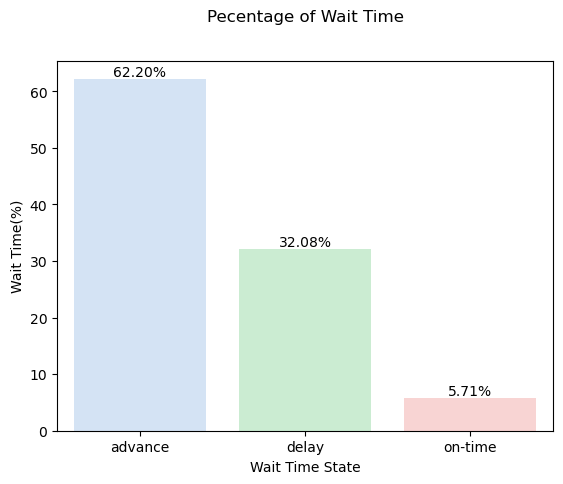

In [8]:
# Set palette
sns.set_palette('pastel6')

# Percentage of delay time
ax = sns.barplot(data = gb, 
            x = 'Wait Time State', 
            y = 'Wait Time(%)',
            alpha = .5)

ax.bar_label(ax.containers[0], fontsize=10, fmt='%.2f%%')
     
ax.text(x=0.5, 
        y=1.1, 
        s='Pecentage of Wait Time',
        fontsize=12,
        ha='center',
        va='bottom', 
        transform=ax.transAxes)

### **Insights**:

* From our initial analysis, we have pinpointed three distinct phases of operation waiting time: advance, delay, and on-time. It is concerning to note that the delay phase currently accounts for 32% of operational waiting time, with delays stretching up to a maximum of 67 hours - nearly equivalent to a significant 3-day setback.
* The data also indicates that currently 62% of operations are completed in advance, leaving us an ample time and resources to address the remaining 32% of delayed operations.
* The visualization highlights an urgent need for us to enhance and optimize our scheduling process to significantly reduce the waiting times and streamline operation prioritization for improved efficiency.